In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!git clone https://github.com/AlexeyAB/darknet
%cd darknet
!sed -i 's/GPU=0/GPU=1/g' Makefile
!cat Makefile
!make

Cloning into 'darknet'...
remote: Enumerating objects: 11208, done.
remote: Total 11208 (delta 0), reused 0 (delta 0), pack-reused 11208
Receiving objects: 100% (11208/11208), 10.75 MiB | 18.22 MiB/s, done.
Resolving deltas: 100% (7556/7556), done.
/content/darknet
GPU=1
CUDNN=0
CUDNN_HALF=0
OPENCV=0
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0

# set GPU=1 and CUDNN=1 to speedup on GPU
# set CUDNN_HALF=1 to further speedup 3 x times (Mixed-precision on Tensor Cores) GPU: Volta, Xavier, Turing and higher
# set AVX=1 and OPENMP=1 to speedup on CPU (if error occurs then set AVX=0)

DEBUG=0

ARCH= -gencode arch=compute_30,code=sm_30 \
      -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52] \
	  -gencode arch=compute_61,code=[sm_61,compute_61]

OS := $(shell uname)

# Tesla V100
# ARCH= -gencode arch=compute_70,code=[sm_70,compute_70]

# GeForce RTX 2080 Ti, RTX 2080, RTX 2070, Quadro RTX 8000, Quadr

In [0]:
!unzip "/content/drive/My Drive/AI_Data/data.zip" -d /content/darknet/data/

Archive:  /content/drive/My Drive/AI_Data/data.zip
   creating: /content/darknet/data/img/
  inflating: /content/darknet/data/img/1.00028400161909_0.jpg  
  inflating: /content/darknet/data/img/1.00028400161909_0.txt  
  inflating: /content/darknet/data/img/1.81JI5O0qB5L._SL1500_ - Copy.jpg  
  inflating: /content/darknet/data/img/1.81JI5O0qB5L._SL1500_ - Copy.txt  
  inflating: /content/darknet/data/img/1.81JI5O0qB5L._SL1500_.jpg  
  inflating: /content/darknet/data/img/1.81JI5O0qB5L._SL1500_.txt  
  inflating: /content/darknet/data/img/10.1136986-1.jpg  
  inflating: /content/darknet/data/img/10.1136986-1.txt  
  inflating: /content/darknet/data/img/11.lay-s-flamin-hot-flavored-potato-chips-10.jpg  
  inflating: /content/darknet/data/img/11.lay-s-flamin-hot-flavored-potato-chips-10.txt  
  inflating: /content/darknet/data/img/12.00028400645492_0.jpg  
  inflating: /content/darknet/data/img/12.00028400645492_0.txt  
  inflating: /content/darknet/data/img/13.lays-chips.jpg  
  inflatin

In [0]:
!wget https://pjreddie.com/media/files/yolov3-tiny.weights
!./darknet partial cfg/yolov3-tiny.cfg yolov3-tiny.weights yolov3-tiny.conv.15 15

--2019-11-21 04:15:16--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  42.3MB/s    in 0.8s    

2019-11-21 04:15:17 (42.3 MB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]

batch = 1, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 

In [0]:
!sed -i 's/batch=1/batch=64/g' cfg/yolov3-tiny_obj.cfg
!sed -i 's/subdivisions=1/subdivisions=16/g' cfg/yolov3-tiny_obj.cfg
!sed -i 's/max_batches = 500200/max_batches = 10000/g' cfg/yolov3-tiny_obj.cfg
!sed -i 's/steps=400000,450000/steps=8000,9000/g' cfg/yolov3-tiny_obj.cfg
!sed -i 's/classes=80/classes=2/g' cfg/yolov3-tiny_obj.cfg
!sed -i 's/filters=255/filters=21/g' cfg/yolov3-tiny_obj.cfg
!cat cfg/yolov3-tiny_obj.cfg

[net]
# Testing
#batch=64
#subdivisions=16
# Training
batch=64
subdivisions=2
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 10000
policy=steps
steps=8000,9000
scales=.1,.1

[convolutional]
batch_normalize=1
filters=16
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=512
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=1

[convolutional]
batch_normalize=1
filters=102

In [0]:
!./darknet detector train data/obj.dat cfg/yolov3-tiny_obj.cfg yolov3-tiny.conv.15

yolov3-tiny_obj
batch = 32, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 max                2x 2/ 2     26 x  26 x 256 ->   13 x  13 x 256 0.000 BF
  10 conv    512       3 x 3/ 1     13 x  13 x 256 ->   13 x  13 x 512 0.399 

In [22]:
!./darknet detector test data/obj.dat cfg/yolov3-tiny_obj.cfg backup/yolov3-tiny_obj_last.weights "/content/drive/My Drive/AI_Data/maggi-noodles-500x500.jpg"

batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 max                2x 2/ 2     26 x  26 x 256 ->   13 x  13 x 256 0.000 BF
  10 conv    512       3 x 3/ 1     13 x  13 x 256 ->   13 x  13 x 512 0.399 BF
  11 max      

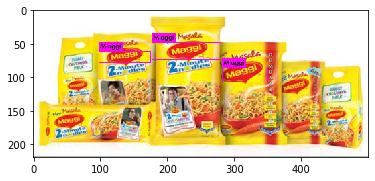

In [23]:
def display_image(file_path = '/content/darknet/predictions.jpg'):
   import cv2
   import matplotlib.pyplot as plt
   import os.path
   if os.path.exists(file_path):
     img = cv2.imread(file_path)
     show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
     plt.imshow(show_img)
   else:
     print('failed to open file')
display_image() 

In [19]:
! cat data/obj.names

Maggi
lays


